In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme("paper")
sns.set_color_codes("deep")

In [70]:
# Load the dataset
df = pd.read_csv("/home/inventor/Datasets/Mall Customer/mall_customer/Mall_Customers.csv")

In [71]:
# Sample of dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
# Shape of dataet
df.shape


(200, 5)

In [73]:
# Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [74]:
# Description about datset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [75]:
X = df.iloc[:, -2:].values

In [76]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [77]:
import random
class CustomKMeans:

    def __init__(self, n_clusters, max_iter=100):

        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centriods = None
    
    def fit_predict(self, X):

        # Init the random centriods
        random_index = random.sample(range(1, X.shape[0]), self.n_clusters)
        self.centriods  = X[random_index]
    
        for i in range(self.max_iter):

            # Assign the cluster
            cluster_group = self.assign_cluster(X)
            # Move the centriods
            old_centriods = self.centriods

            self.centriods = self.move_centriods(X, cluster_group)
            # Check the finish

            if (old_centriods == self.centriods).all():
                break
        
        return cluster_group
    
    def assign_cluster(self, X):
        cluster_group = []
        distances = []

        for row in X:
            for centriod in self.centriods:
                distances.append(np.sqrt(np.dot(row-centriod, row-centriod)))
            
            min_distance = min(distances)

            index_position = distances.index(min_distance)

            cluster_group.append(index_position)

            distances.clear()
        
        return np.array(cluster_group)
    
    def move_centriods(self, X, cluster_group):

        new_centriods = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:

            new_centriods.append(X[cluster_group == type].mean(axis=0))
        
        return np.array(new_centriods)




In [78]:
from sklearn.cluster import KMeans

In [79]:
# Optimal number of n_cluster

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)



In [80]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73880.64496247195,
 44448.4554479337,
 37265.86520484346,
 34600.583058627104,
 29044.682915273133,
 23975.723861443217,
 20067.08361425396]

([<matplotlib.axis.XTick at 0x7099e570ac90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

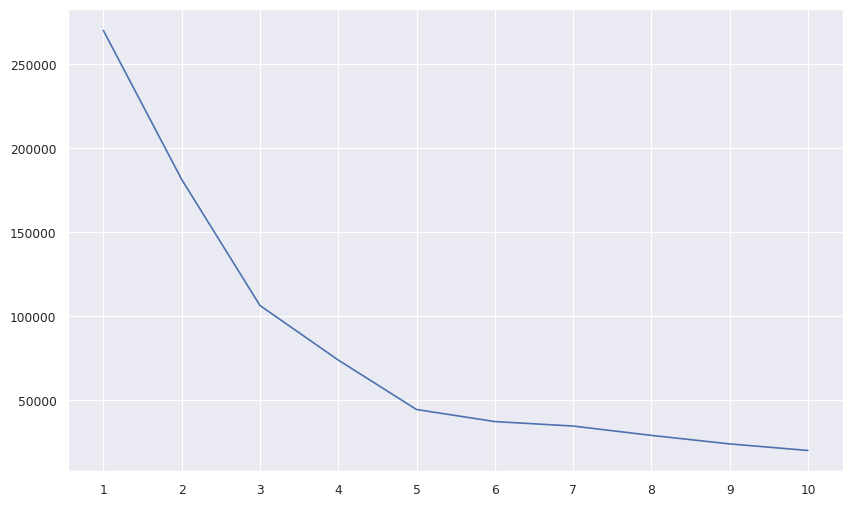

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.xticks(np.arange(1, 11, 1))

In [82]:
kmeans = CustomKMeans(n_clusters=5)

In [83]:
X.shape

(200, 2)

In [84]:
y_pred = kmeans.fit_predict(X)

In [85]:
y_pred

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

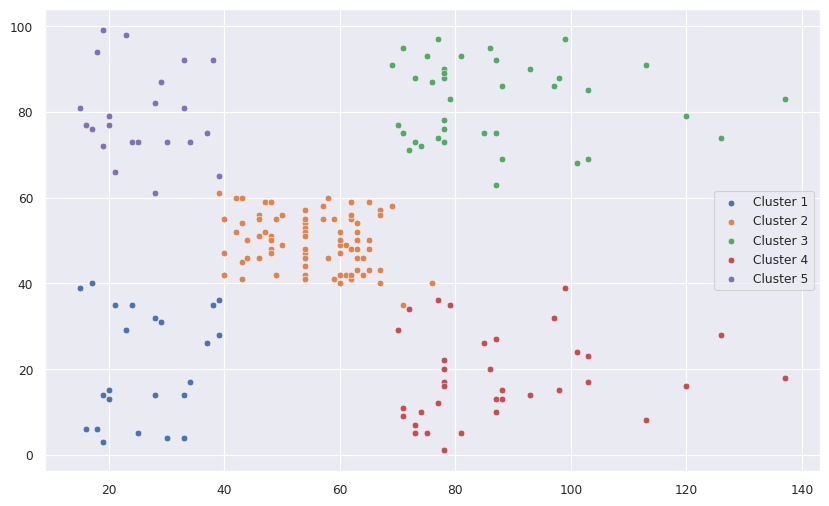

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[y_pred == 0,0], y=X[y_pred == 0,1], label="Cluster 1")
sns.scatterplot(x=X[y_pred == 1,0], y=X[y_pred == 1,1], label="Cluster 2")
sns.scatterplot(x=X[y_pred == 2,0], y=X[y_pred == 2,1], label="Cluster 3")
sns.scatterplot(x=X[y_pred == 3,0], y=X[y_pred == 3,1], label="Cluster 4")
sns.scatterplot(x=X[y_pred == 4,0], y=X[y_pred == 4,1], label="Cluster 5")
plt.legend()
plt.show()